In [10]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [11]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

In [13]:
import numpy as np

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)

X = data.data
y = data.target

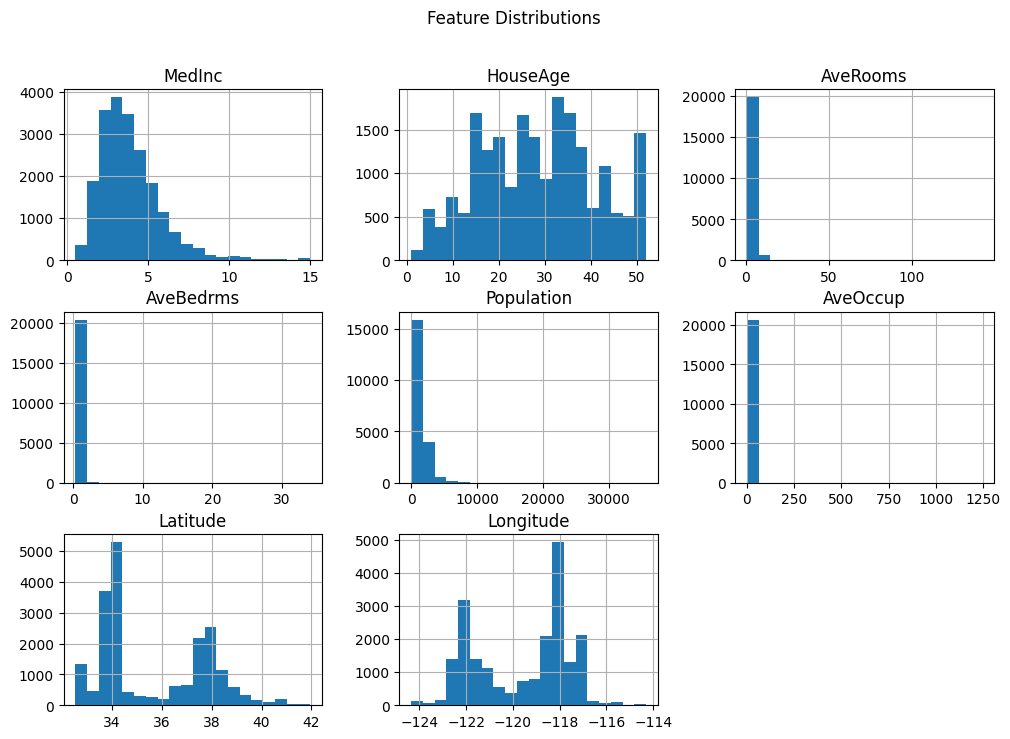

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

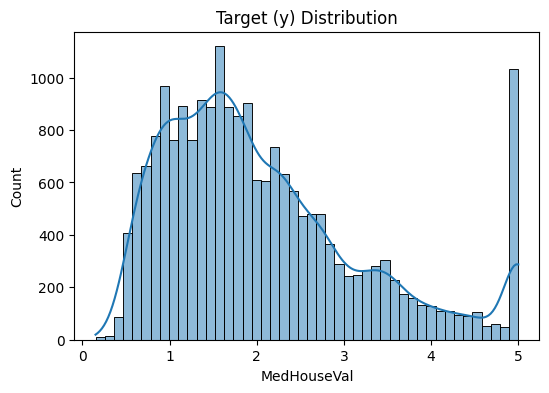

In [15]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

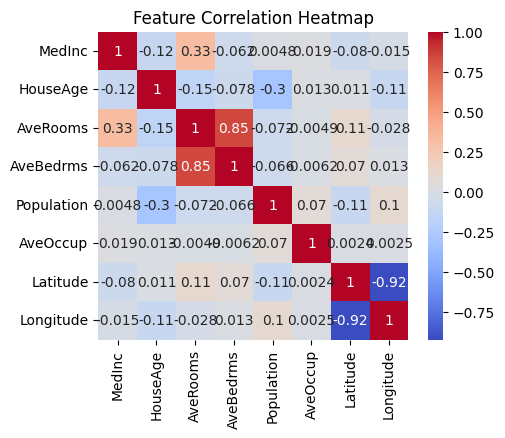

In [16]:
plt.figure(figsize=(5, 4))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [17]:
X = X.values.astype(float)
y = np.array(y).reshape(-1)

In [18]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=5, n_chains=4, ndpost=1000, nskip=1000, n_trees=100, n_jobs=5)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.425834                 1.652056             1.560669   
1                  1.582534                 1.542657             2.169608   
2                  1.320861                 1.524938             1.612980   
3                  1.356780                 1.714037             1.386451   
4                  1.333166                 1.882803             1.688385   
mean               1.403835                 1.663298             1.683618   
std                0.107831                 0.145414             0.293523   

      DefaultBART_Rhat_RMSE  
0                  1.632926  
1                  1.741892  
2                  1.666140  
3                  1.758868  
4                  1.702545  
mean               1.700474  
std                0.052133  


In [19]:
rhat_df.to_csv("results/real3_CalHousing_rhat.csv", index=False)

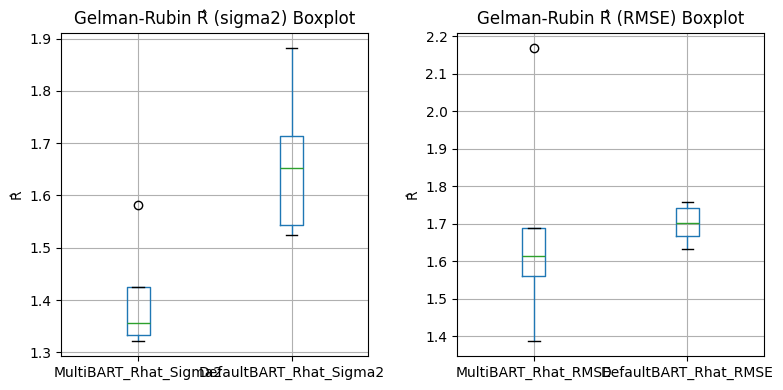

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

INFO:2025-10-28 18:17:18,412:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-28 18:17:32,765:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:2025-10-28 18:17:44,915:jax._src.xla_bridge:822: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: libtpu.so: cannot open shared object file: No such file or directory
INFO:jax._src.xla_bridge:Unable to initialize backend 'tpu': INTERNAL: Failed to op

test_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.217211  0.220808  0.284304  0.272079  0.218599
1      0.222918  0.227810  0.289723  0.261053  0.217833
2      0.225849  0.233558  0.290290  0.262780  0.226877
3      0.209349  0.211569  0.273101  0.244411  0.213037
4      0.213065  0.228576  0.277802  0.265762  0.223567
5      0.221100  0.221952  0.286447  0.255995  0.223564
6      0.214416  0.228216  0.285769  0.266244  0.228732
7      0.219026  0.224067  0.292374  0.272201  0.226946
8      0.225014  0.233533  0.283058  0.258863  0.219225
9      0.215330  0.221989  0.288779  0.250176  0.214931
mean   0.218328  0.225208  0.285165  0.260956  0.221331
std    0.005420  0.006615  0.005954  0.008966  0.005385



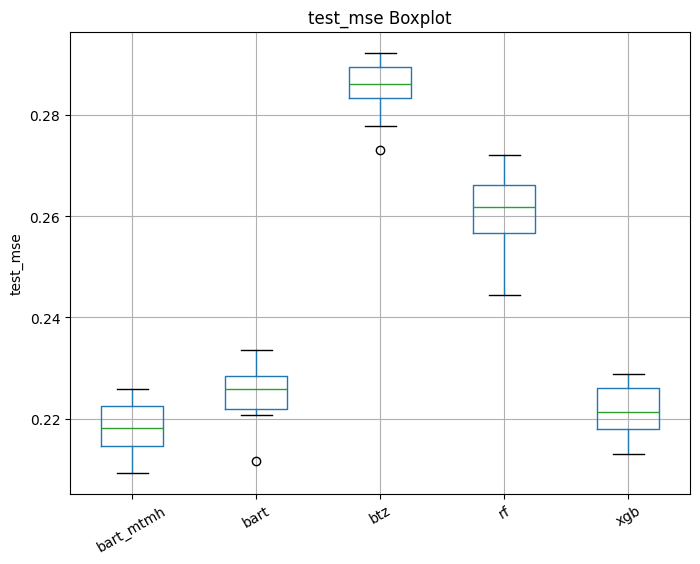

train_mse:
      bart_mtmh      bart       btz        rf       xgb
0      0.157800  0.174678  0.264529  0.036415  0.070528
1      0.160130  0.173069  0.259645  0.036316  0.071458
2      0.153058  0.172521  0.252435  0.035701  0.067329
3      0.163591  0.176445  0.259378  0.036102  0.072052
4      0.158996  0.176718  0.256466  0.034991  0.072937
5      0.155957  0.168189  0.268078  0.036173  0.067958
6      0.158131  0.177635  0.255568  0.035879  0.070881
7      0.155211  0.171869  0.257327  0.036122  0.072070
8      0.157577  0.172123  0.254505  0.035792  0.069747
9      0.153884  0.172277  0.250741  0.035290  0.072473
mean   0.157433  0.173552  0.257867  0.035878  0.070743
std    0.003112  0.002846  0.005304  0.000453  0.001893



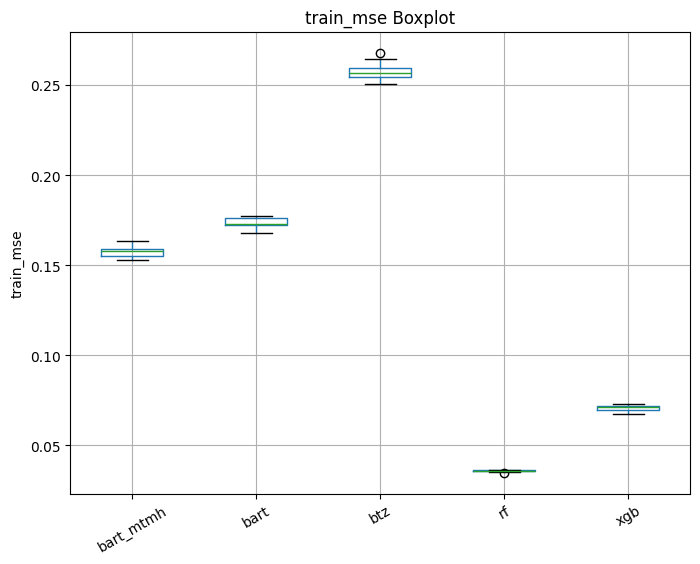

pi_length:
      bart_mtmh      bart       btz
0      1.620308  1.707358  2.168424
1      1.625116  1.691926  2.178405
2      1.610671  1.693551  2.148860
3      1.641915  1.703181  2.168989
4      1.617693  1.710936  2.162055
5      1.597769  1.682897  2.198315
6      1.625285  1.710267  2.164696
7      1.609079  1.695076  2.150019
8      1.625076  1.690308  2.118576
9      1.588273  1.688216  2.147729
mean   1.616119  1.697372  2.160607
std    0.015355  0.009869  0.021269



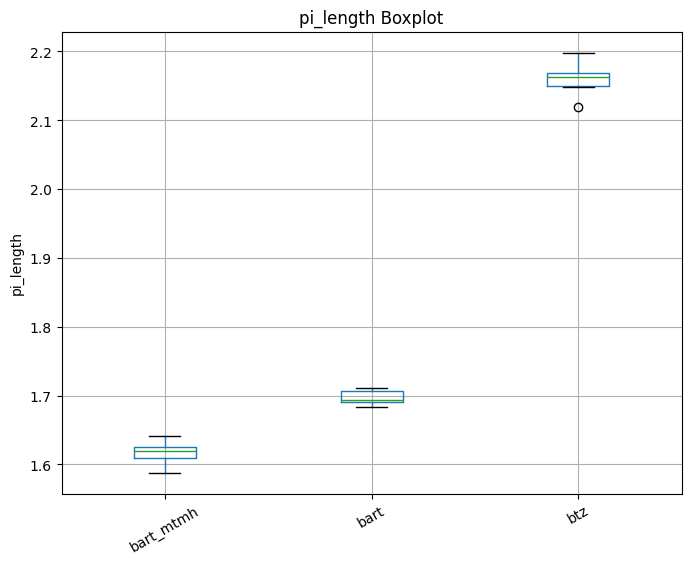

coverage:
      bart_mtmh      bart       btz
0      0.922674  0.931395  0.950581
1      0.925388  0.934690  0.948256
2      0.926550  0.931008  0.946512
3      0.934496  0.934690  0.949419
4      0.933333  0.936434  0.953682
5      0.924225  0.931395  0.947868
6      0.933915  0.933333  0.949612
7      0.923062  0.930620  0.943605
8      0.927519  0.928682  0.944186
9      0.925194  0.931202  0.946899
mean   0.927636  0.932345  0.948062
std    0.004574  0.002357  0.002998



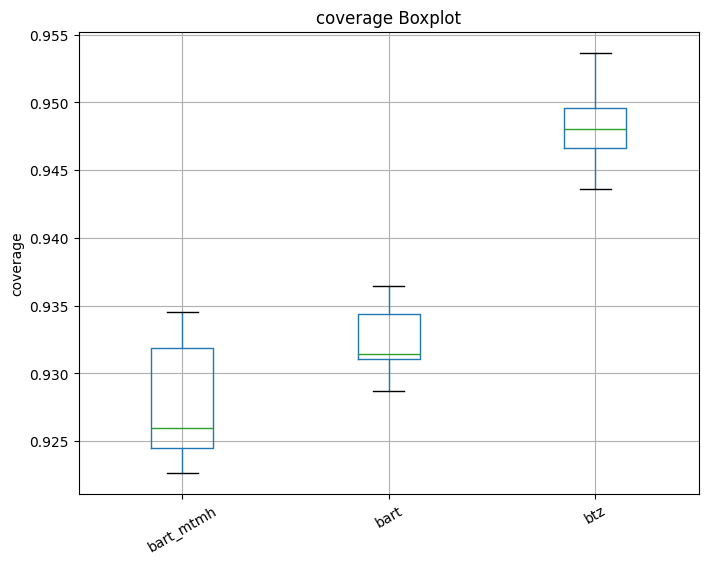

train_time:
       bart_mtmh       bart        btz         rf       xgb
0     610.027952  85.801737  70.563405  17.709257  0.196701
1     589.409583  79.831982  73.656418  19.006559  0.220149
2     608.907605  89.472625  70.064851  14.952225  0.174839
3     628.164119  80.661739  71.845170  13.646722  0.176961
4     601.970643  81.703424  71.024050  16.590590  0.188963
5     601.378377  81.272569  77.741501  15.037555  0.184295
6     618.480761  93.753945  73.210024  19.353387  0.228406
7     604.722893  98.561639  72.452863  15.621733  0.179274
8     634.206038  90.188072  70.993062  18.315175  0.227384
9     619.678084  90.075972  73.181134  14.869078  0.178916
mean  611.694606  87.132370  72.473248  16.510228  0.195589
std    13.517682   6.313111   2.219415   1.980342  0.021565



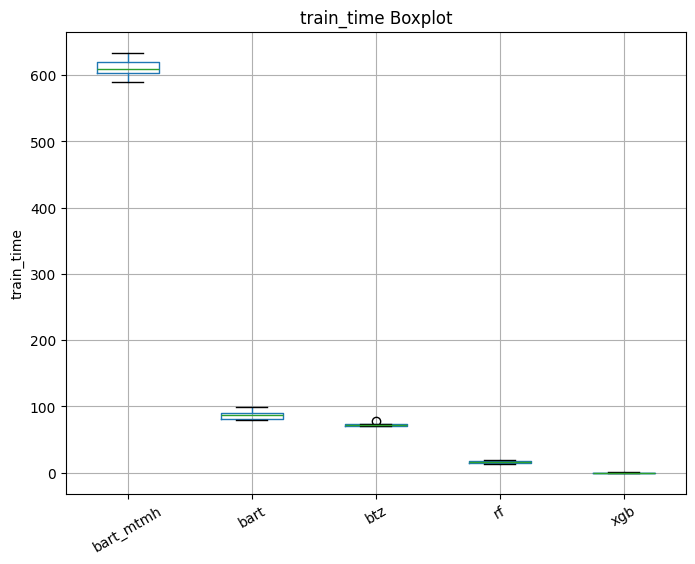

In [21]:
import matplotlib.pyplot as plt
import comparison
import pandas as pd

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=1000, n_post=1000, n_trees=100, n_jobs=5)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [22]:
for k, v in mse_results.items():
    csv_name = f"results/real3_CalHousing_{k}.csv"
    v.to_csv(csv_name, index=False)

## Multi-tries

In [ ]:
from multi_tries import multi_tries_performance
import pandas as pd

csv_path = "results/real3_CalHousing_tries.csv"
existing_df = None

if os.path.exists(csv_path):
    existing_df = pd.read_csv(csv_path)

df = multi_tries_performance(
    X, y,
    multi_tries_list=[1, 5, 10, 50, 100],
    n_runs=5, n_chains=4,
    ndpost=1000, nskip=1000, n_trees=100, n_jobs=5
)

if existing_df is not None:
    df = pd.concat([existing_df, df], ignore_index=True)
    df = df.sort_values(by='multi_tries', ascending=True).reset_index(drop=True)

df.to_csv("results/real3_CalHousing_tries.csv", index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("results/real3_CalHousing_tries.csv")
print(df)